In [15]:
import keras
from keras.datasets import fashion_mnist  #importing fashion mnist from keras

In [16]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

### Checking the data

In [17]:
train_data.shape

(60000, 28, 28)

In [55]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [18]:
train_labels.shape

(60000,)

In [51]:
label_index = [         "T-shirt/top",     # index 0
                        "Trouser",         # index 1
                        "Pullover",        # index 2 
                        "Dress",           # index 3 
                        "Coat",            # index 4
                        "Sandal",          # index 5
                        "Shirt",           # index 6 
                        "Sneaker",         # index 7 
                        "Bag",             # index 8 
                        "Ankle boot"]      #index 9]  

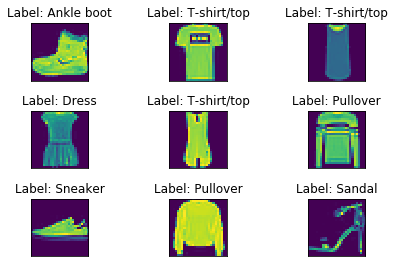

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(train_data[i], interpolation='none')
  plt.title("Label: {}".format(label_index[train_labels[i]]))
  plt.xticks([])
  plt.yticks([])
plt.savefig('Labels example')

### Preparing the data for processing

In [21]:
x_train = train_data.reshape(train_data.shape[0],28,28,1) # reshaping the data to create a third dimension for colour
x_test = test_data.reshape(test_data.shape[0],28,28,1)

In [22]:
y_train =keras.utils.to_categorical(train_labels, 10) #one hot encoding label data
y_test =keras.utils.to_categorical(test_labels, 10)

In [23]:
import numpy as np
x_train = x_train.astype('float32')/np.max(train_data) #normalizing data
x_test = x_test.astype('float32')/np.max(train_data)

In [24]:
from keras import models,layers
model = models.Sequential()

In [25]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [26]:
model.compile(optimizer='rmsprop',
              metrics= ['accuracy'] ,
              loss = 'categorical_crossentropy' )

In [27]:
history = model.fit(x_train,y_train,
                     epochs=10, 
                    batch_size = 512,
                   validation_data=(x_test,y_test),
                   verbose=0)

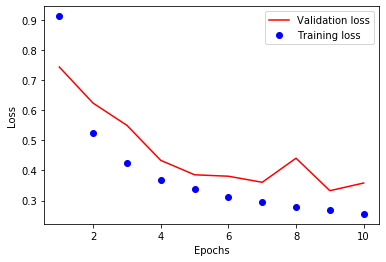

In [28]:
val_loss = history.history['val_loss']
train_loss = history.history['loss']
epochs = np.arange(1,11)
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.plot(epochs,train_loss,'bo',label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

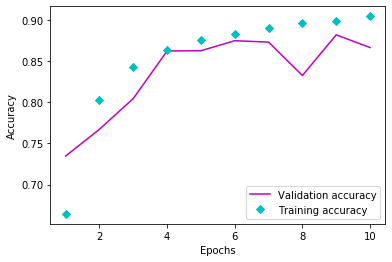

In [43]:
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']
epochs = np.arange(1,11)
plt.plot(epochs,val_acc,'m',label='Validation accuracy')
plt.plot(epochs,train_acc,'cD',label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Accuracy graph')